# Deliverable 3: Optimize the Model

### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
## Drop SPECIAL_CONSIDERATIONS column
application_df = application_df.drop(columns='SPECIAL_CONSIDERATIONS')
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT  ASK_AMT  IS_SUCCESSFUL  
0   Association       1              0     5000              1  
1  Co-operative       1         1-9999   108590              1  
2   Association       1              0     5000              0  
3         Trust       1    10000-24999     6692              1  
4         Trust       1  100000-499999   142590              1

In [5]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

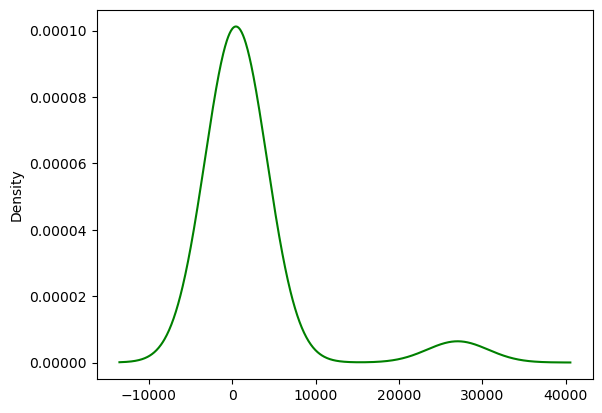

In [6]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_counts.plot.density(color='green')

In [7]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
## The most straightforward method is to use a density plot to identify where the value counts "fall off" 
## and set the threshold within this region.
replace_application = list(application_counts[application_counts < 1000].index)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

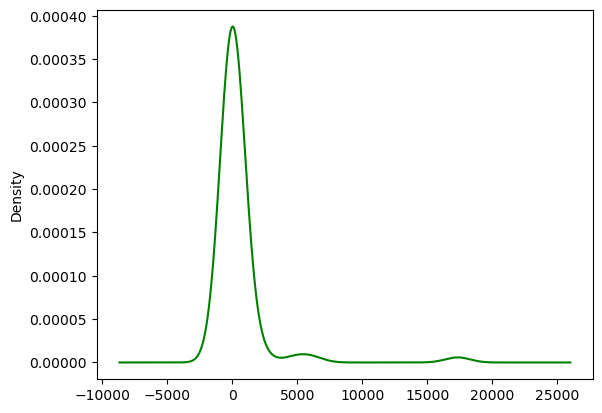

In [9]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density(color='green')

In [10]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\tomok\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                     1.0                   0.0                  0.0   
1                     0.0                   0.0                  1.0   
2                     0.0                   0.0                  0.0   
3                     0.0                   0.0                  1.0   
4                     0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  AFFILIATION_Family/Parent  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           1.0                        0.0   
3                           1.0                        0.0   
4                           0.0                        0.0   

   AFFILIATION_Independent  AFFILIATION_National  ...  ORGANIZATION_Trust  \
0                      1.0                   0.0  ...                 0.0   
1                      1.0                   0.0  ...                 0.0   
2                      0.0                   0.0  ...                 0.0   
3                      0.0                   0.0  ...                 1.0   
4                      1.0                   0.0  ...                 1.0   

   INCOME_AMT_0  INCOME_AMT_1-9999  INCOME_AMT_10000-24999  \
0           1.0                0.0                     0.0   
1           0.0                1.0                     0.0   
2           1.0                0.0                     0.0   
3           0.0                0.0                     1.0   
4           0.0                0.0                     0.0   

   INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  \
0                       0.0                 0.0               0.0   
1                       0.0                 0.0               0.0   
2                       0.0                 0.0               0.0   
3                       0.0                 0.0               0.0   
4                       1.0                 0.0               0.0   

   INCOME_AMT_25000-99999  INCOME_AMT_50M+  INCOME_AMT_5M-10M  
0                     0.0              0.0                0.0  
1                     0.0              0.0                0.0  
2                     0.0              0.0                0.0  
3                     0.0              0.0                0.0  
4                     0.0              0.0                0.0  

[5 rows x 36 columns]

In [13]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\tomok\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     1.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  AFFILIATION_CompanySponsored  \
0                  0.0                  0.0                           0.0   
1                  0.0                  0.0                           0.0   
2                  1.0                  0.0                           1.0   
3                  0.0                  0.0                           1.0   
4                  0.0                  0.0                           0.0   

   ...  ORGANIZATION_Trust  INCOME_AMT_0  INCOME_AMT_1-9999  \
0  ...                 0.0           1.0                0.0   
1  ...                 0.0           0.0                1.0   
2  ...                 0.0           1.0                0.0   
3  ...                 1.0           0.0                0.0   
4  ...                 1.0           0.0                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 39 columns]

In [14]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=['IS_SUCCESSFUL'])


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

#third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3120      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,191
Trainable params: 6,191
Non-trainable params: 0
_________________________________________________________________


## Deliverable 3: The model's weights are saved every 5 epochs and export your results to an HDF5 file

In [17]:
# Import checkpoint dependencies
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:n}.hdf5"

In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
781/804 [============================>.] - ETA: 0s - loss: 0.5708 - accuracy: 0.7198
Epoch 1: saving model to checkpoints\weights.1.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5707 - accuracy: 0.7201
Epoch 2/50
785/804 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.7297
Epoch 2: saving model to checkpoints\weights.2.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5567 - accuracy: 0.7295
Epoch 3/50
778/804 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7319
Epoch 3: saving model to checkpoints\weights.3.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5536 - accuracy: 0.7318
Epoch 4/50
798/804 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7319
Epoch 4: saving model to checkpoints\weights.4.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.7317
Epoch 5/50
802/804 [============================>.] 

793/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7386
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7388
Epoch 36/50
799/804 [============================>.] - ETA: 0s - loss: 0.5418 - accuracy: 0.7389
Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5416 - accuracy: 0.7389
Epoch 37/50
781/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7379
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.7385
Epoch 38/50
782/804 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.7382
Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.7385
Epoch 39/50
789/804 [============================>.]

In [20]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

#third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.5.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5620 - accuracy: 0.7230 - 515ms/epoch - 2ms/step
Loss: 0.5619773864746094, Accuracy: 0.7230320572853088


In [21]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity_opt.h5")

In [22]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity_opt.h5')

In [23]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5620 - accuracy: 0.7230 - 469ms/epoch - 2ms/step
Loss: 0.5619773864746094, Accuracy: 0.7230320572853088
